# Model Garbage Classification
Capstone Project SIB Kampus Merdeka X Dicoding.
Team ID: **CSD-114**

Datasets: [Kaggle Garbage Classification (12 classes)](https://www.kaggle.com/mostafaabla/garbage-classification)

## Download Package

In [ ]:
!pip install matplotlib
!pip install tensorflow

You should consider upgrading via the 'C:\Users\Jonathan Suhalim\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## Importing Library

In [2]:
import os
import pathlib

import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from PIL import Image

print(f'Tensorflow version: {tf.__version__}')

Tensorflow version: 2.17.1


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumn2u/garbage-classification-v2")

print("Path to dataset files:", path)

100%|██████████| 705M/705M [00:37<00:00, 19.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/5


In [ ]:
# Directory that holds the data
DATA_DIR = 'C:/Users/Jonathan Suhalim/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/5/garbage-dataset'

# Subdirectories for each class
data_dir_battery = os.path.join(DATA_DIR, 'battery')
data_dir_biological = os.path.join(DATA_DIR, 'biological')
dara_dir_cardboard = os.path.join(DATA_DIR, 'cardboard')
data_dir_clothes = os.path.join(DATA_DIR, 'clothes')
data_dir_glass = os.path.join(DATA_DIR, 'glass')
data_dir_metal = os.path.join(DATA_DIR, 'metal')
data_dir_paper = os.path.join(DATA_DIR, 'paper')
data_dir_plastic = os.path.join(DATA_DIR, 'plastic')
data_dir_trash = os.path.join(DATA_DIR, 'trash')
data_dir_shoes = os.path.join(DATA_DIR, 'shoes')


# os.listdir returns a list containing all files under the given dir
print(f"There are {len(os.listdir(data_dir_battery))} images of battery.")
print(f"There are {len(os.listdir(data_dir_biological))} images of biological.")
print(f"There are {len(os.listdir(dara_dir_cardboard))} images of cardboard.")
print(f"There are {len(os.listdir(data_dir_clothes))} images of clothes.")
print(f"There are {len(os.listdir(data_dir_glass))} images of glass.")
print(f"There are {len(os.listdir(data_dir_metal))} images of metal.")
print(f"There are {len(os.listdir(data_dir_paper))} images of paper.")
print(f"There are {len(os.listdir(data_dir_plastic))} images of plastic.")
print(f"There are {len(os.listdir(data_dir_shoes))} images of shoes.")

There are 944 images of battery.
There are 983 images of biological.
There are 1810 images of cardboard.
There are 5323 images of clothes.
There are 1572 images of glass.
There are 994 images of metal.
There are 1645 images of paper.
There are 1912 images of plastic.
There are 1977 images of shoes.


### Data Cleaning

In [ ]:
def is_non_jpeg_png(image_path):
    try:
        img = Image.open(image_path)
        if img.format != 'JPEG' and img.format != 'PNG':  # Check if not JPEG and not PNG
            print(f"Non-JPEG/PNG image: {image_path}, Format: {img.format}")
            img.close()
            return True  # Non-JPEG/PNG
        img.close()
        return False  # JPEG or PNG
    except (IOError, SyntaxError) as e:
        print(f"Corrupted or invalid image: {image_path}, Error: {e}")
        return True  # Non-JPEG/PNG or corrupted

non_jpeg_png_files = []
for data_dir in [data_dir_battery, data_dir_biological, dara_dir_cardboard, data_dir_clothes, data_dir_glass, data_dir_metal, data_dir_paper, data_dir_plastic, data_dir_trash, data_dir_shoes]:  # Replace with your actual directory variables
    for filename in os.listdir(data_dir):
        image_path = os.path.join(data_dir, filename)
        if is_non_jpeg_png(image_path):
            non_jpeg_png_files.append(image_path)

print(f"Found {len(non_jpeg_png_files)} non-JPEG/PNG image files: {non_jpeg_png_files}")

Found 0 non-JPEG/PNG image files: []


In [ ]:
# Delete the non-JPEG/PNG files
for file_path in non_jpeg_png_files:
    try:
        os.remove(file_path)
        print(f"Deleted: {file_path}")
    except OSError as e:
        print(f"Error deleting {file_path}: {e}")

print(f"Deleted {len(non_jpeg_png_files)} non-JPEG/PNG files.")

Deleted: /root/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/5/garbage-dataset/glass/glass_1810.jpg
Deleted: /root/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/5/garbage-dataset/paper/paper_3119.jpg
Deleted: /root/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/5/garbage-dataset/paper/paper_1678.jpg
Deleted: /root/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/5/garbage-dataset/paper/paper_2318.jpg
Deleted: /root/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/5/garbage-dataset/paper/paper_3138.jpg
Deleted: /root/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/5/garbage-dataset/paper/paper_2784.jpg
Deleted: /root/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/5/garbage-dataset/plastic/plastic_1503.jpg
Deleted: /root/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/5/garbage-dataset/plastic/plastic_1000.jpg
Deleted: /root/.

## Data Preparation

In [ ]:


PATH = 'C:/Users/Jonathan Suhalim/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/5/garbage-dataset'
PATH

'C:/Users/Jonathan Suhalim/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/5/garbage-dataset'

In [ ]:
data_dir = pathlib.Path(PATH)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(f'Total image from this datasets : {image_count}')

print(f'\nDistribution Image')
for i, label in enumerate(os.listdir(data_dir)):
  label_dir = os.path.join(data_dir, label)
  len_label_dir = len(os.listdir(label_dir))
  print(f'{i+1}. {label} : {len_label_dir}')

Total image from this datasets : 17160

Distribution Image
1. battery : 944
2. biological : 983
3. cardboard : 1810
4. clothes : 5323
5. glass : 1572
6. metal : 994
7. paper : 1645
8. plastic : 1912
9. shoes : 1977


## Data preprocessing

### Set up Paramters

In [3]:
BATCH_SIZE = 16
IMG_SIZE = (224, 224)

np.random.seed(123)
seed = np.random.randint(0,100)
print(f"Current seed : {seed}")

Current seed : 66


### Load data using a Keras utility

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=seed,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=seed,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

Found 17160 files belonging to 9 classes.
Using 13728 files for training.
Found 17160 files belonging to 9 classes.
Using 3432 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names_val = val_ds.class_names

print(f'List label Train data: \n{class_names}\n')
print(f'List label Validation data: \n{class_names_val}')

List label Train data: 
['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes']

List label Validation data: 
['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes']


### Check Image batch

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 224, 224, 3)
(16,)


### Plot Data

NameError: name 'class_names' is not defined

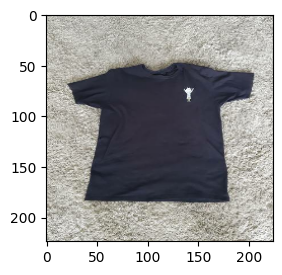

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Split Validation data to Test data

In [ ]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_dataset = val_ds.take(val_batches // 5)
val_ds = val_ds.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_ds))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 172
Number of test batches: 43


### Configure data performance for Training

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

### Create Layer Model

#### Data Augmentation Layer

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2)],
  name="data_augmentation")

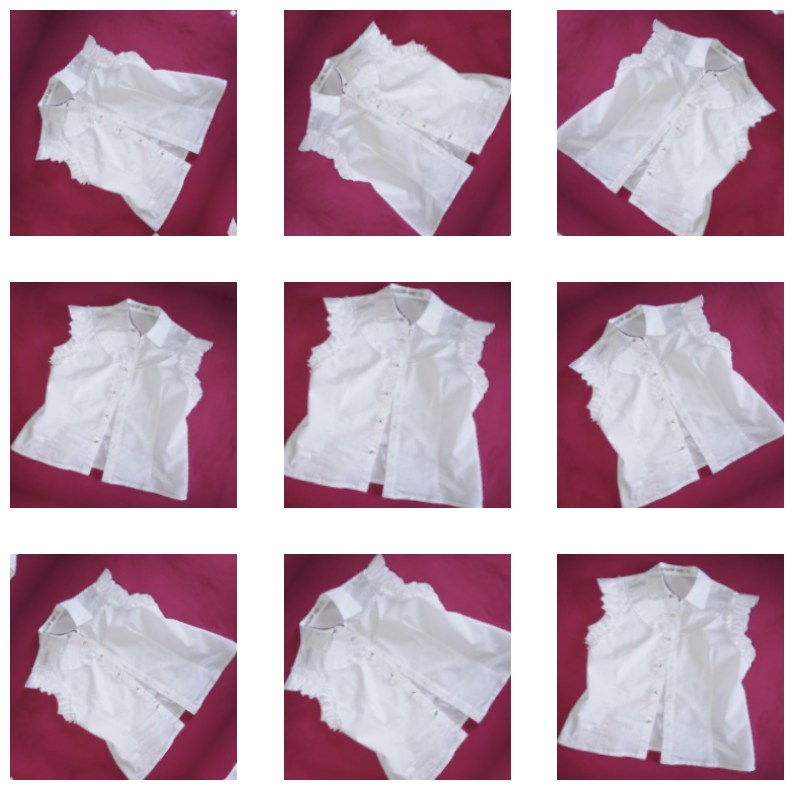

In [ ]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

#### Rescale pixel Layer

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

#### Global Average Layer

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

#### Base Model Layer

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.trainable = False

#### Input Layer

In [ ]:
inputs = tf.keras.Input(shape=IMG_SIZE + (3,))

### Create Model

In [ ]:
def model_builder():

  # Number Classes from data
  num_classes = len(class_names)

  # Create Model Sequential keras
  model = tf.keras.Sequential()

  # Add Custom Layer
  model.add(inputs)
  model.add(data_augmentation)
  model.add(normalization_layer)
  model.add(base_model)
  model.add(global_average_layer)

  # Add fully connected layer with dropout
  model.add(tf.keras.layers.Dense(units=256, activation="relu"))
  model.add(tf.keras.layers.Dropout(0.2))

  # Prediction Layer
  model.add(tf.keras.layers.Dense(num_classes, activation='softmax', name="final_output"))

  base_learning_rate = 1e-3
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

  return model

#### Define Callbacks

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("checkpoint_model.keras",
                                                      monitor="val_accuracy",
                                                      save_best_only=True,
                                                      verbose=1)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=5,
                                                  mode ="max",
                                                  verbose=2,
                                                  restore_best_weights=True)

In [ ]:
model = model_builder()
print(f"Model : {model}")

Model : <Sequential name=sequential, built=True>


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ final_output (Dense)            │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,553 (8.93 MB)

 Trainable params: 82,569 (322.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(train_ds,
                    epochs=100,
                    validation_data=val_ds,
                    callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9071 - loss: 0.2688
Epoch 1: val_accuracy improved from -inf to 0.93222, saving model to checkpoint_model.keras
858/858 ━━━━━━━━━━━━━━━━━━━━ 94s 109ms/step - accuracy: 0.9071 - loss: 0.2688 - val_accuracy: 0.9322 - val_loss: 0.2006
Epoch 2/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9158 - loss: 0.2464
Epoch 2: val_accuracy did not improve from 0.93222
858/858 ━━━━━━━━━━━━━━━━━━━━ 93s 108ms/step - accuracy: 0.9158 - loss: 0.2464 - val_accuracy: 0.9260 - val_loss: 0.2129
Epoch 3/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9130 - loss: 0.2598
Epoch 3: val_accuracy did not improve from 0.93222
858/858 ━━━━━━━━━━━━━━━━━━━━ 91s 106ms/step - accuracy: 0.9130 - loss: 0.2598 - val_accuracy: 0.9289 - val_loss: 0.2001
Epoch 4/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.9176 - loss: 0.2477
Epoch 4: val_accuracy improved from 0.93222 to 0.93659, saving model to checkpoint_model.kera

### Plot Result

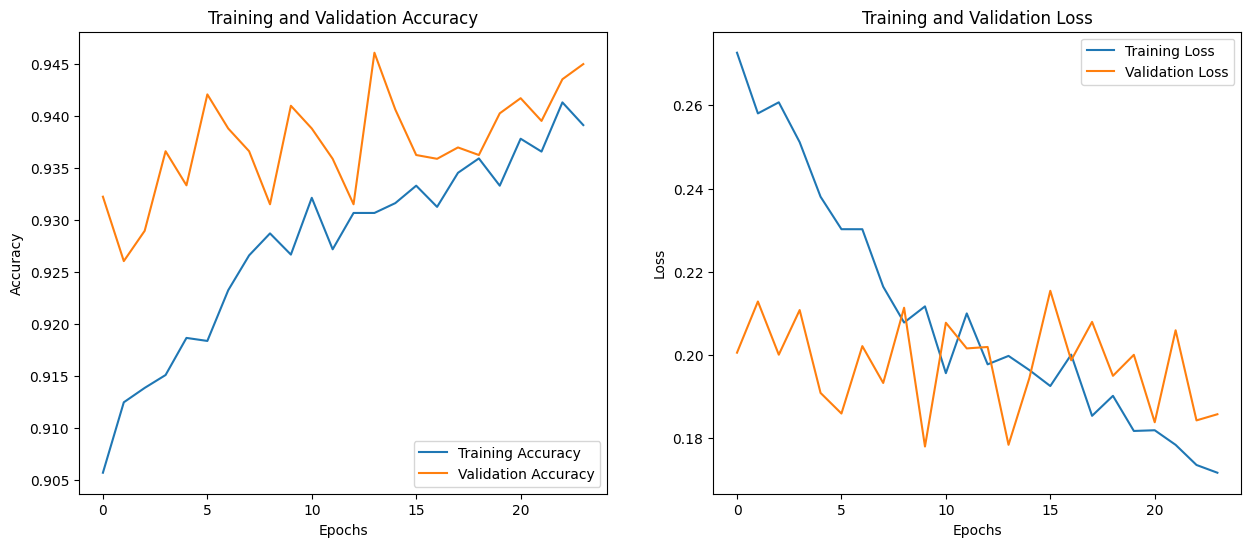

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Test Model

In [6]:
load_model = tf.keras.models.load_model('/content/checkpoint_model.keras')

In [ ]:
load_model.save('garbage_classification.h5')

In [ ]:
load_model.evaluate(x=test_dataset, return_dict=True)

43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.9392 - loss: 0.1865


{'accuracy': 0.9360465407371521, 'loss': 0.20957070589065552}

Saving png-transparent-mineral-water-bottles-mineral-water-bottles-mineral-water-pure-water-thumbnail.png to png-transparent-mineral-water-bottles-mineral-water-bottles-mineral-water-pure-water-thumbnail.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
png-transparent-mineral-water-bottles-mineral-water-bottles-mineral-water-pure-water-thumbnail.png
plastic
[[1.2027775e-10 1.3773392e-08 2.6946393e-05 1.5505410e-03 1.5871301e-05
  1.6629600e-07 1.4014109e-05 9.9838734e-01 5.1540087e-06]]
0.99838734


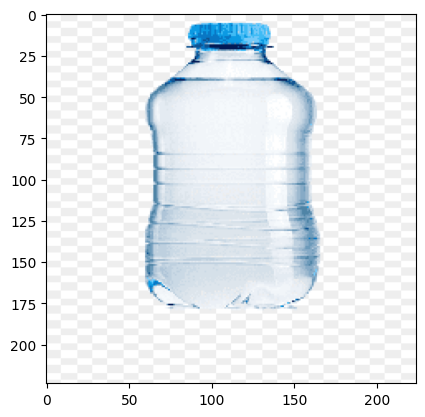

In [7]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size= IMG_SIZE + (3,))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = load_model.predict(images, batch_size=10)
  outclass = np.argmax(classes)

  print(fn)
  plt.imshow(img)
  for i, label in enumerate(class_names):
    if outclass == i:
      predic = classes[0][i]
      print(label)
      print(classes)
      print(predic)


In [4]:
class_names= ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes']

## Convet Model Into JSON

In [ ]:
path_model_keras = r'C:\Users\Jonathan Suhalim\Documents\AILEARNING\TensorflowNotebooks\garbage_classification.h5'
load_model.save(path_model_keras)

In [ ]:
path_model = "C:/Users/Jonathan Suhalim/Documents/AILEARNING/TensorflowNotebooks/garbage_classification.h5"
output_path = "C:/Users/Jonathan Suhalim/Documents/AILEARNING/TensorflowNotebooks/"

!tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model {path_model} {output_path}